Note: you may need to restart the kernel to use updated packages.
--- Environment Check ---
✅ Virtual Environment is: ACTIVE
📍 Location: /opt/homebrew/Cellar/jupyterlab/4.5.2/libexec
✅ NumPy version: 2.4.1
✅ Matplotlib version: module://matplotlib_inline.backend_inline backend active

Attempting to open a test plot window...


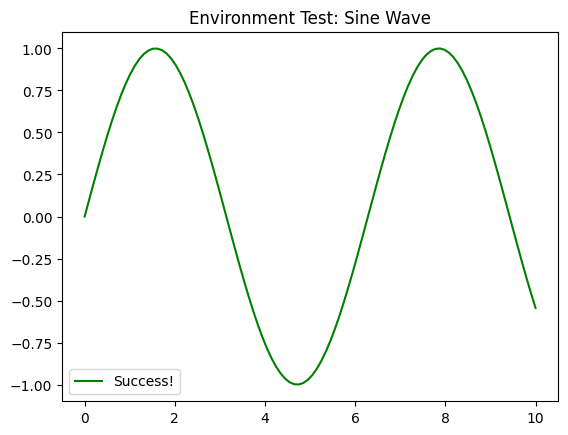

✅ Plotting successful!


In [1]:
#Bartlett 2026
#Setup the environment and check that packages are working -- packages must be installed in the notebook. 
%pip install numpy matplotlib scipy
import sys
import numpy as np
import matplotlib.pyplot as plt

def verify_setup():
    print("--- Environment Check ---")
    
    # 1. Check Python Path (Are we in the venv?)
    if hasattr(sys, 'real_prefix') or (target := sys.base_prefix != sys.prefix):
        print(f"✅ Virtual Environment is: ACTIVE")
        print(f"📍 Location: {sys.prefix}")
    else:
        print("❌ Virtual Environment is: NOT ACTIVE")

    # 2. Check Libraries
    try:
        print(f"✅ NumPy version: {np.__version__}")
        print(f"✅ Matplotlib version: {plt.get_backend()} backend active")
        
        # 3. Quick Plot Test
        print("\nAttempting to open a test plot window...")
        x = np.linspace(0, 10, 100)
        y = np.sin(x)
        
        plt.plot(x, y, color='green', label='Success!')
        plt.title("Environment Test: Sine Wave")
        plt.legend()
        plt.show()
        
        print("✅ Plotting successful!")
        
    except Exception as e:
        print(f"❌ Error: {e}")

if __name__ == "__main__":
    verify_setup()

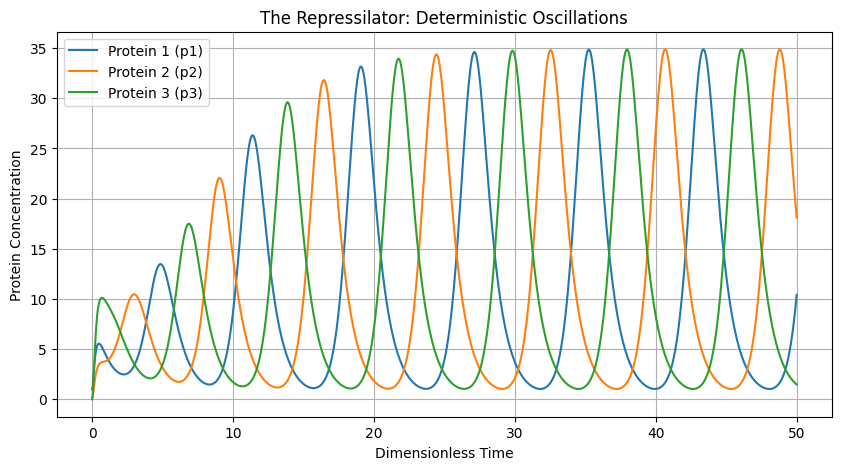

In [4]:
#Set parameters
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters
alpha = 100.0      # Maximal transcription rate
alpha0 = 0.1       # Leakiness (basal transcription)
n = 2.0            # Hill coefficient (cooperativity)
beta = 5.0         # Ratio of protein decay rate to mRNA decay rate

def repressilator_model(y, t, alpha, alpha0, n, beta):
    # m = mRNA, p = Protein
    m1, p1, m2, p2, m3, p3 = y
    
    # ODEs based on the Elowitz & Leibler (2000) model
    dm1_dt = -m1 + alpha / (1 + p3**n) + alpha0
    dp1_dt = -beta * (p1 - m1)
    
    dm2_dt = -m2 + alpha / (1 + p1**n) + alpha0
    dp2_dt = -beta * (p2 - m2)
    
    dm3_dt = -m3 + alpha / (1 + p2**n) + alpha0
    dp3_dt = -beta * (p3 - m3)
    
    return [dm1_dt, dp1_dt, dm2_dt, dp2_dt, dm3_dt, dp3_dt]

# Initial conditions [m1, p1, m2, p2, m3, p3]
initial_conditions = [0, 1, 0, 0, 0, 0]
t = np.linspace(0, 50, 1000)

# Solve
sol = odeint(repressilator_model, initial_conditions, t, args=(alpha, alpha0, n, beta))

# Plotting Proteins
plt.figure(figsize=(10, 5))
plt.plot(t, sol[:, 1], label='Protein 1 (p1)')
plt.plot(t, sol[:, 3], label='Protein 2 (p2)')
plt.plot(t, sol[:, 5], label='Protein 3 (p3)')
plt.xlabel('Dimensionless Time')
plt.ylabel('Protein Concentration')
plt.title('The Repressilator: Deterministic Oscillations')
plt.legend()
plt.grid(True)
plt.show()

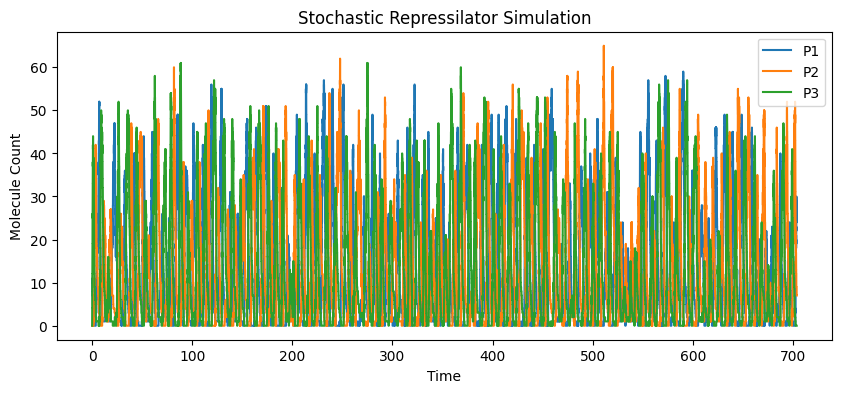

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def gillespie_repressilator(steps=50000):
    # Simplified parameters (Transcription + Translation combined)
    alpha = 50.0
    k_decay = 1.0
    n = 3
    
    # State: [P1, P2, P3]
    P = np.array([10, 0, 0], dtype=float)
    time = [0]
    history = [P.copy()]
    
    for _ in range(steps):
        p1, p2, p3 = P
        
        # Propensities (Rates of reactions)
        # Production rates (Hill function)
        r_prod = [alpha / (1 + p3**n), alpha / (1 + p1**n), alpha / (1 + p2**n)]
        # Decay rates
        r_decay = [k_decay * p1, k_decay * p2, k_decay * p3]
        
        rates = r_prod + r_decay
        total_rate = sum(rates)
        
        if total_rate == 0: break
        
        # Time step
        dt = -np.log(np.random.random()) / total_rate
        time.append(time[-1] + dt)
        
        # Choose reaction
        r = np.random.random() * total_rate
        cumulative_rate = 0
        for i, rate in enumerate(rates):
            cumulative_rate += rate
            if r < cumulative_rate:
                if i < 3: P[i] += 1 # Production
                else: P[i-3] -= 1   # Decay
                break
        history.append(P.copy())
        
    return np.array(time), np.array(history)

t_stoch, p_stoch = gillespie_repressilator()

plt.figure(figsize=(10, 4))
plt.step(t_stoch, p_stoch[:, 0], label='P1')
plt.step(t_stoch, p_stoch[:, 1], label='P2')
plt.step(t_stoch, p_stoch[:, 2], label='P3')
plt.title("Stochastic Repressilator Simulation")
plt.xlabel("Time")
plt.ylabel("Molecule Count")
plt.legend()
plt.show()